## Imports
- *pandas*: for data analysis based on tables and timelines
- *numpy*: used for operations with vectors and matrix
- *matplotlib*: interactive, data visualization
  - *pyplot*: collection of functions that make matplot work
- *seaborn*: data visualization based on matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/tmp/ipykernel_1501/3636539039.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data processing
We take the dataset file and read through it.
- Delete non existing data (null)
- Avoid 0s in non boolean values
- Add ratios from bedrooms and rooms per househol

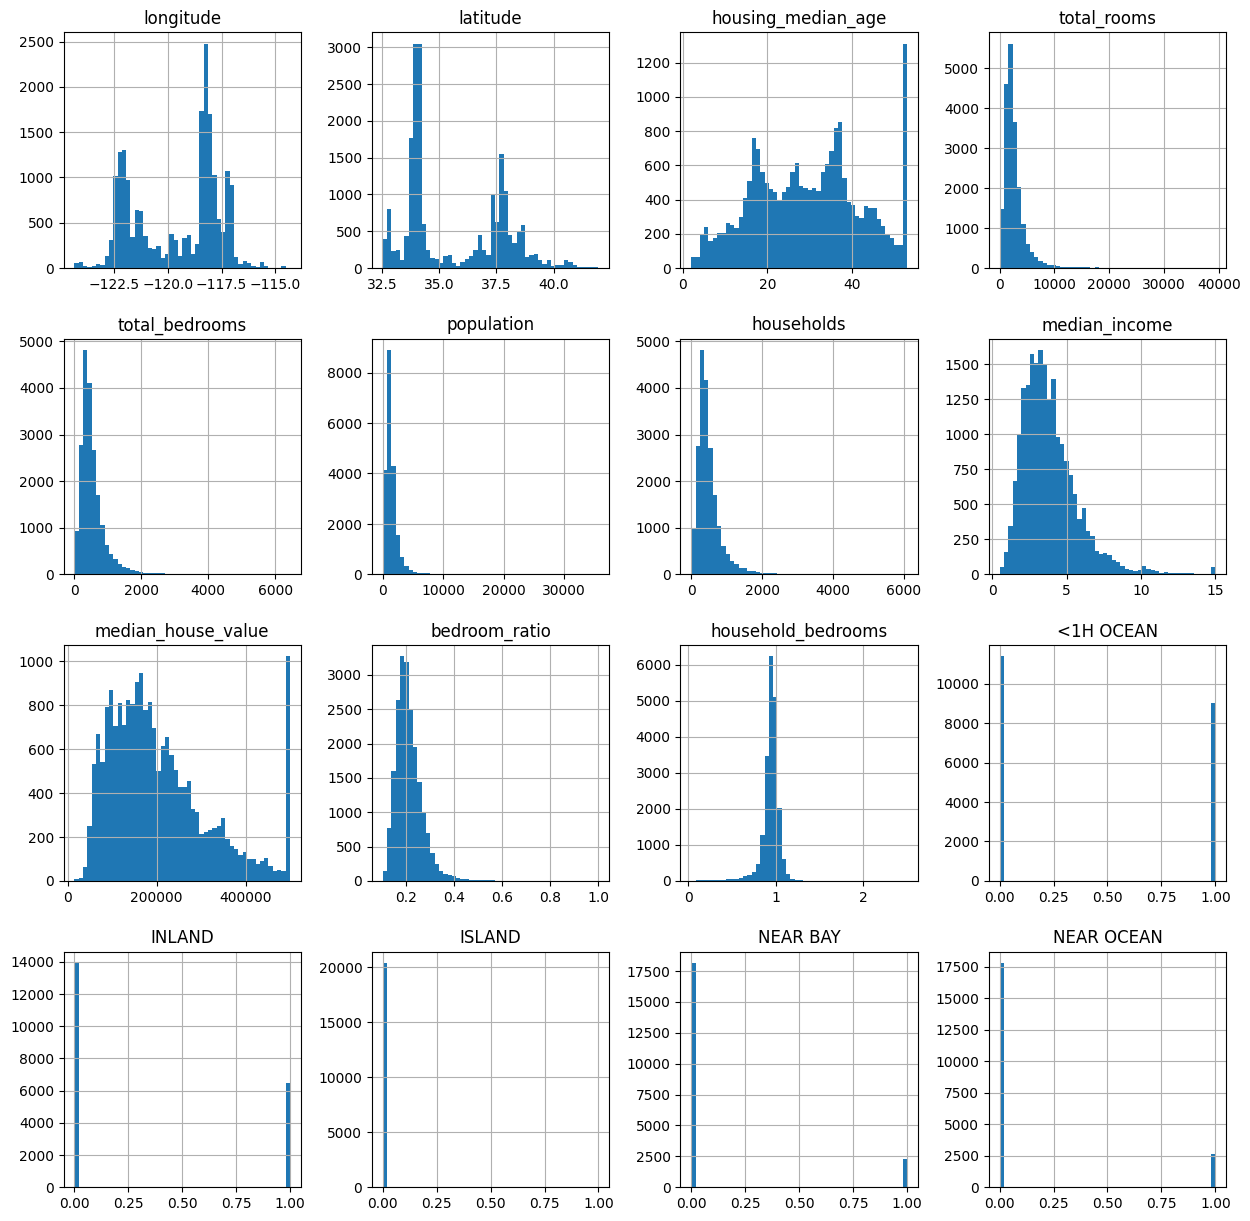

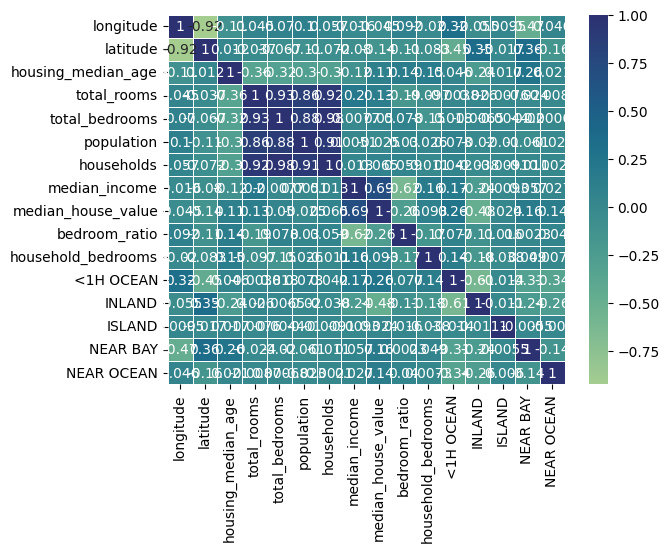

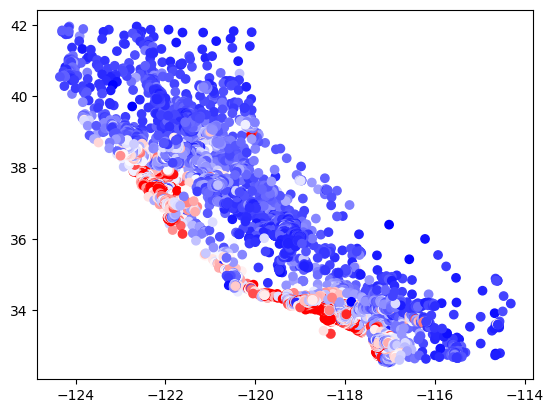

In [4]:
# Import data
housing = pd.read_csv("housing.csv")

# Remove null data; Check with data.info()
# inplace, mutate original data
housing.dropna(inplace=True)

# Avoid 0s
housing["housing_median_age"] = housing["housing_median_age"] + 1
housing["total_rooms"] = housing["total_rooms"] + 1
housing["total_bedrooms"] = housing["total_bedrooms"] + 1
housing["population"] = housing["population"] + 1
housing["households"] = housing["households"] + 1

# Ratios
housing["bedroom_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["household_bedrooms"] = housing["households"] / housing["total_bedrooms"]

# Change Ocean proximity to features
housing = housing.join(pd.get_dummies(housing["ocean_proximity"], dtype=int))
housing.drop("ocean_proximity", axis=1, inplace=True)

housing

# Show histogram (distribution)
housing.hist(bins=50, figsize=(15,15))
plt.show()
# Show correlations between housing features
# WE ONLY CARE ABOUT THE RELATIONS WITH median_house_value
sb.heatmap(housing.corr(numeric_only=True), annot=True, cmap="crest", linewidths=.5)
plt.show()

# Distribution of houses (geolocall)
plt.scatter(housing["longitude"], housing["latitude"], c=housing["median_house_value"], cmap="bwr")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.drop("median_house_value", axis=1), housing["median_house_value"], test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [7]:
reg.score(X_test, y_test)

0.657521999598325

### Random forest model

In [12]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
forest.score(X_test, y_test)

0.821102393790031

### Random forest with grid search CV

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  "n_estimators": [100, 200, 300],
  "max_depth": [None, 4, 8],
  "min_samples_split": [2, 4],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
best_forest = grid_search.best_estimator_

In [27]:
best_forest.score(X_test, y_test)

0.821517907006659